逻辑回归问题的极大似然解法
==========

In [1]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(0xff)

在本例中，我们使用的数据和感知机那一节所使用的数据相同，如下：

![problemset](problemset.png)

不过本例中不同的是，我们将该问题视作一个二分类问题，而不是回归问题。

对于一个输入$x$，我们定义它属于1类的概率为$\hat{p}$，计算如下：

$$
\hat{p}(x, w) = \phi( w^T x )
$$

其中$w$是待确定的参数，$\phi$是sigmoid函数，使用sigmoid函数的一个原因是，根据$\hat{p}(x, w)$的定义，有$\hat{p}(x, w) \in [0, 1]$，而sigmoid函数能够将输出限制到$(0, 1)$之间。$\phi(z) = \frac{1}{1 + e^{-z}}$，其函数图像如下：

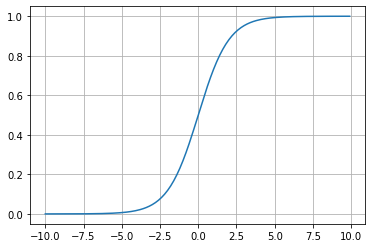

In [2]:
z = np.arange(-10, 10, 0.1)
plt.plot(z, 1/(1 + np.exp(-z)))
plt.grid()
plt.show()

$\phi(z)$的导数为$\phi'(z)=\phi(z)(1-\phi(z))$

有了$\hat{p}(x)$的定义，我们可以定义输入$x$属于0类和1类的概率：

$$
\begin{align*}
P(y=1 | x, w) & = \hat{p}(x, w) \\
P(y=0 | x, w) & = 1 - \hat{p}(x, w)
\end{align*}
$$

上面两个公式可以统一为一个公式：

$$
p(y | x, w) = \hat{p}(x, w)^y (1 - \hat{p}(x, w))^{1-y}
$$

其中$y$是一个参数，如果我们需要计算$x$属于1类的概率，则将$y$设为$1$，然后按照右边的公式进行计算，同样可以将$y$设为$0$计算属于0类的概率。

然后我们可以定义“**根据参数$w$，产生输入$X$的正确分类$Y$的概率**”，此处的$X$和$Y$是指全体数据。比如假设我们找到一个参数$w$，计算出$x1$属于1类的概率为$0.7$，$x2$属于1类的概率为$0.6$，而$x1$的真实分类为1,$x2$的真实分类为0,那么由我们计算出的概率生成$x1$和$x2$的正确分类的概率为$0.7 \times (1 - 0.6) = 0.28$，这个数值就是likelihood。

可以看到，随着我们调整参数$w$，最终生成正确分类的概率也会改变，极大似然算法的目标就是找出参数$w$是的最终的likelihood最大。

但是在实际计算中，由于计算likelihood中需要计算很多数值在$0$到$1$范围内的连乘，会导致最终的结果太小，因此一般都会对likelihood取log（因为log函数是单调函数，likelihood最大的参数，在取log之后依然是最大的）。

而log函数的底数的选择并不太重要，一般选择以$e$为底，主要是便于求导。

到此，我们可以定义参数$w$的log-likelihood：

$$
\begin{align*}
L(w) & = log p(Y | X, w) \\
     & = log \prod_{(x, y) \in samples} p(y | x, w) \\
     & = \sum_{(x, y) \in samples} log p(y | x, w) \\
     & = \sum_{(x, y) \in samples} log( \hat{p}(x, w)^y (1 - \hat{p}(x, w))^{1-y} ) \\
     & = \sum_{(x, y) \in samples} y \times log( \hat{p}(x, w) ) + (1-y) \times log( 1 - \hat{p}(x, w) )
\end{align*}
$$

我们可以使用梯度下降的算法来求解该问题，$L(w)$的导数为：

$$
\begin{align*}
\frac{\partial{L(w)}}{\partial{w}}
    & = \sum_{(x, y) \in samples} \left( y \times \frac{1}{\hat{p}(x, w)} - (1-y) \times \frac{1}{1 - \hat{p}(x, w)} \right) \times \frac{\partial{\hat{p}(x, w)}}{\partial{w}} \\
    & = \sum_{(x, y) \in samples} \left( y \times \frac{1}{\phi( w^T x )} - (1-y) \times \frac{1}{1 - \phi( w^T x )} \right) \times \frac{\partial{\phi( w^T x )}}{\partial{w}} \\
    & = \sum_{(x, y) \in samples} \left( y \times \frac{1}{\phi( w^T x )} - (1-y) \times \frac{1}{1 - \phi( w^T x )} \right) \times \phi( w^T x )(1 - \phi( w^T x )) \times x \\
    & = \sum_{(x, y) \in samples} \left( y \times (1 - \phi( w^T x )) - (1-y) \times \phi( w^T x ) \right) \times x \\
    & = \sum_{(x, y) \in samples} ( y - y \times \phi( w^T x ) - \phi( w^T x ) + y \times \phi( w^T x ) ) \times x \\
    & = \sum_{(x, y) \in samples} ( y - \phi( w^T x ) ) \times x
\end{align*}
$$

推导过程有点长，但是并不复杂，最后的结果也非常简洁。这里还是要提醒一下，在实际的机器学习中，可以只用关注每个简单运算的求导即可，并不需要求出一个解析解。

In [3]:
x = np.transpose(np.array([
    [0, 0, 1],
    [1, 1, 1],
    [1, 0, 1],
    [0, 1, 1],
]))
y = np.array([
    0, 1, 1, 0
])
new_x = np.array([
    1, 0, 0
])

设置数据

In [4]:
w = np.random.rand(3)
w

array([0.46393652, 0.22303538, 0.32222402])

随机初始化参数

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(np.dot(w, x))

array([0.57986617, 0.73286276, 0.68700633, 0.63303504])

In [6]:
learning_rate = 0.01 # 学习率
steps = 10000 # 迭代数量

设定梯度下降相关参数

In [7]:
print(f'y = {y}')
for step in range(steps):
    output = sigmoid(np.dot(w, x)) # 计算输出
    gradient = (y - output)[:, np.newaxis] * np.transpose(x)
    gradient = np.sum(gradient, axis=0) # 计算梯度
    
    w = w + learning_rate * gradient # 更新
    if step % 1000 == 0:
        print(f'step = {step}, output = {output}')

y = [0 1 1 0]
step = 0, output = [0.57986617 0.73286276 0.68700633 0.63303504]
step = 1000, output = [0.166824   0.88722435 0.92022258 0.12015289]
step = 2000, output = [0.09144295 0.93878021 0.95869007 0.06235682]
step = 3000, output = [0.06205814 0.95857442 0.97239128 0.04165868]
step = 4000, output = [0.04673184 0.96884246 0.97932902 0.03117215]
step = 5000, output = [0.03739216 0.97508383 0.9835017  0.0248668 ]
step = 6000, output = [0.03112653 0.97926518 0.98628206 0.0206672 ]
step = 7000, output = [0.02664041 0.98225654 0.98826516 0.01767315]
step = 8000, output = [0.02327391 0.98450018 0.98974993 0.01543237]
step = 9000, output = [0.02065641 0.98624405 0.99090274 0.01369322]


可以看到，在迭代了这么多次之后，我们的输出与标准输出已经非常接近了。

这里需要注意的是，我们的目标是使得log-likelihood最大，因此参数$w$的更新规则是$w = w + learning\_rate \times \frac{\partial L(w)}{w}$。

In [8]:
new_y = sigmoid(np.dot(new_x, w))

print(f'w = {w}, new_x = {new_x}, new_y = {new_y}')

w = [ 8.76606251 -0.41760842 -3.96778809], new_x = [1 0 0], new_y = 0.9998440879404841


我们同样可以使用牛顿迭代法求解使$L(w)$最大的参数$w$，不过比较麻烦的地方在于牛顿迭代法是用来求解零点的，并不是求解最小点或最大点（比如，有一个函数$f(z)$，牛顿迭代能够找到一个$z$使得$f(z)=0$，但是并不能找到f(z)的最大点或者最小点）。

因此使用牛顿迭代法找$L(w)$的最大值实际上是寻找参数$w$使得$L'(w)=0$，参数$w$的更新规则是：

$$
w = w - \frac{L'(w)}{L''(w)}
$$

因此此处需要求解$L(w)$的二阶导，由于参数$w$是一个多维向量，参数$w$的更新规则是：

$$
w = w - H^{-1} \nabla_w L(w)
$$

其中$H$是$L(w)$关于$w$的海森矩阵(Hessian matrix, https://en.wikipedia.org/wiki/Hessian_matrix)。